# Explore here

It's recommended to use this notebook for exploration purposes.

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [5]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:

url = "https://es.wikipedia.org/wiki/Leucocito"
html_data = requests.get(url, time.sleep(10)).text


if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Leucocito - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-p

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Leucocito - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinne

In [8]:
tabla = soup.find_all("table", {"class": "wikitable"})
tabla

[<table class="wikitable">
 <tbody><tr>
 <th>Tipo</th>
 <th>Apariencia microscópica</th>
 <th>Diagrama</th>
 <th>Porcentaje aproximado en adultos</th>
 <th>Diámetro (μm)</th>
 <th><sup class="reference separada" id="cite_ref-isbn0-443-01657-7_7-0"><a href="#cite_note-isbn0-443-01657-7-7"><span class="corchete-llamada">[</span>7<span class="corchete-llamada">]</span></a></sup>​ Principal objetivo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-1"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Núcleo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-2"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Gránulos</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-3"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada"

In [9]:
import pandas as pd 

data = pd.read_html(str(tabla))

print(data[0])

         Tipo  Apariencia microscópica  Diagrama  \
0  Neutrófilo                      NaN       NaN   
1  Eosinófilo                      NaN       NaN   
2    Basófilo                      NaN       NaN   
3   Linfocito                      NaN       NaN   
4    Monocito                      NaN       NaN   

  Porcentaje aproximado en adultos  \
0                              62%   
1                             2.3%   
2                             0.4%   
3                              30%   
4                             5.3%   

                                       Diámetro (μm)  \
0                                              10-12   
1                                              10-12   
2                                              12-15   
3  Linfocitos pequeños: 7–8 Linfocitos grandes: 1...   
4                                          12-15[8]​   

                             [7]​ Principal objetivo  \
0                             Bacterias Hongos Virus   
1  Macrop

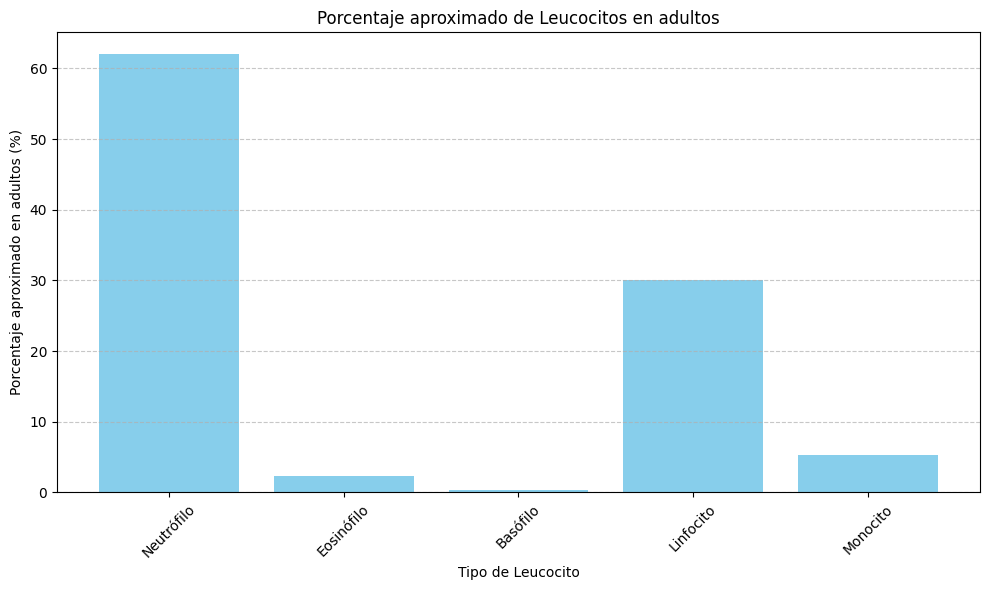

In [11]:
import matplotlib.pyplot as plt

data = {
    'Tipo': ['Neutrófilo', 'Eosinófilo', 'Basófilo', 'Linfocito', 'Monocito'],
    'Porcentaje aproximado en adultos': [62, 2.3, 0.4, 30, 5.3]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.bar(df['Tipo'], df['Porcentaje aproximado en adultos'], color='skyblue')
plt.xlabel('Tipo de Leucocito')
plt.ylabel('Porcentaje aproximado en adultos (%)')
plt.title('Porcentaje aproximado de Leucocitos en adultos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
